In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
rock_df = pd.read_csv('history-of-rock-spotify - Copy.csv')

In [3]:
rock_df.drop(columns=['index','danceability.1', 'name', 'artist', 'instrumentalness'], axis=1, inplace=True)

In [4]:
rock_df.head()

,release_date,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,1991,5.032000,74,0.502,0.000025,0.912,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1971,8.047167,78,0.338,0.580000,0.340,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,1975,5.905333,74,0.392,0.288000,0.402,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,1971,3.131100,77,0.547,0.907000,0.257,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,1965,3.713550,77,0.723,0.038300,0.863,2,0.1280,-7.890,0.0338,136.302,4,0.931


## Understanding the Data

In [5]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   release_date    5484 non-null   int64  
 1   length          5484 non-null   float64
 2   popularity      5484 non-null   int64  
 3   danceability    5484 non-null   float64
 4   acousticness    5484 non-null   float64
 5   energy          5484 non-null   float64
 6   key             5484 non-null   int64  
 7   liveness        5484 non-null   float64
 8   loudness        5484 non-null   float64
 9   speechiness     5484 non-null   float64
 10  tempo           5484 non-null   float64
 11  time_signature  5484 non-null   int64  
 12  valence         5484 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 557.1 KB


Seems like all the data is numeric...let's take a closer look.

In [6]:
rock_df.describe()

,release_date,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,1991.196389,4.148302,49.413202,0.511047,0.173019,0.715642,5.191284,0.202984,-8.007842,0.057867,125.317722,3.947119,0.556601
std,15.331628,1.496269,17.317263,0.147916,0.242596,0.204980,3.489761,0.176790,3.534529,0.047112,28.375444,0.290485,0.241503
min,1956.000000,0.162533,0.000000,0.000000,0.000001,0.003830,0.000000,0.012000,-32.909000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,3.302100,40.000000,0.413000,0.003658,0.584000,2.000000,0.091400,-10.083750,0.032800,104.362500,4.000000,0.367000
50%,1993.000000,3.945442,52.000000,0.515000,0.048400,0.758000,5.000000,0.132000,-7.408500,0.042100,123.885000,4.000000,0.561000
75%,2004.000000,4.680271,62.000000,0.611000,0.260250,0.885000,9.000000,0.269250,-5.308000,0.062900,142.731250,4.000000,0.750250
max,2020.000000,24.091767,84.000000,0.987000,0.995000,0.998000,11.000000,0.999000,1.949000,0.550000,217.913000,5.000000,0.990000


Most of the variables have values between 0 and 1. It may be appropriate to change time_signature and key to a categorica variable. Also, some of these continuous variables could be converted to categorical variables.

<h3><font color='blue'>Transforming Features</font></h3>

In [7]:
#preprocessor = preprocessing.PowerTransformer()
#preprocessed_num = pd.DataFrame(preprocessor.fit_transform(rock_df[["liveness", "loudness", "length"]]), columns=[["speechiness", "liveness", "loudness", "length"]])

from scipy.stats import boxcox
rock_df['acousticness'],_ = boxcox(rock_df['acousticness'])
rock_df['energy'],_ = boxcox(rock_df['energy'])

<h3><font color=00B5C7>Categorizing Continuous Variables</font></h3>

In [8]:
def categorize_speech(speech):
    if speech >= 0.60:
        return 'spoken'
    elif speech >= 0.33 and speech < 0.60 :
        return 'music/spoken'
    elif speech < 0.33:
        return 'music'

rock_df['speech'] = rock_df['speechiness'].apply(categorize_speech)

print(rock_df.groupby("speech")["speechiness"].count())

speech
music           5456
music/spoken      28
Name: speechiness, dtype: int64


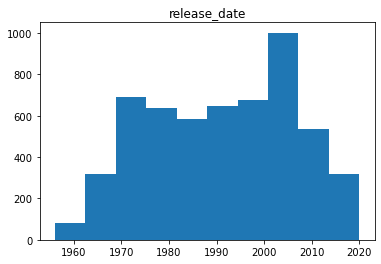

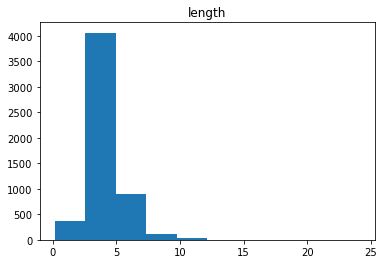

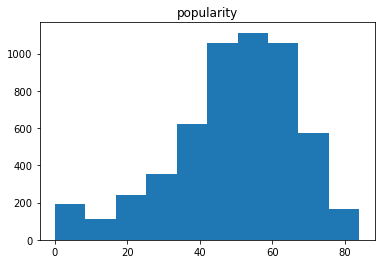

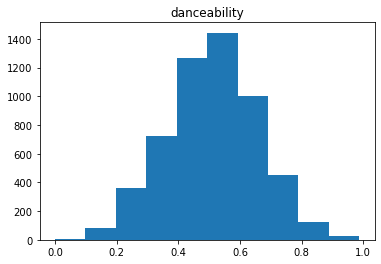

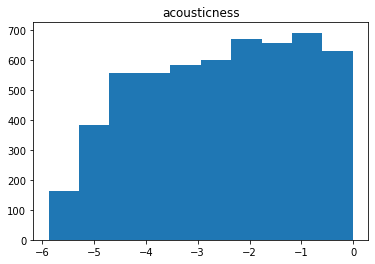

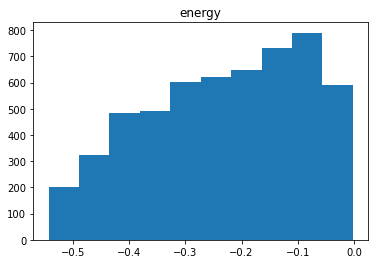

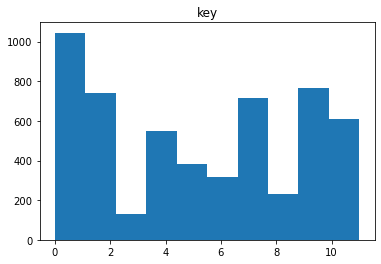

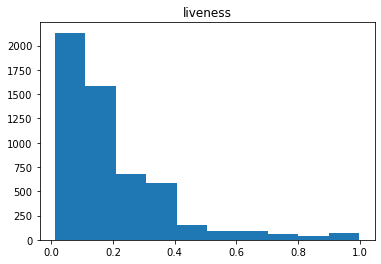

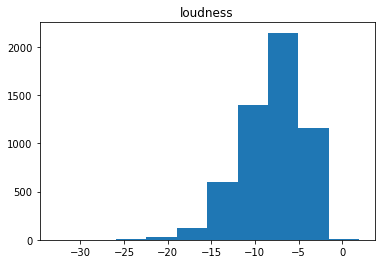

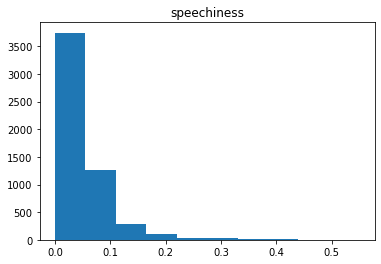

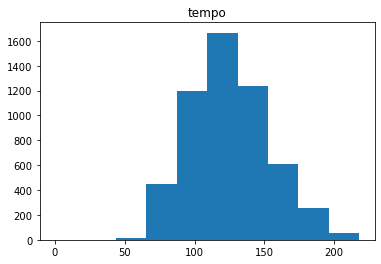

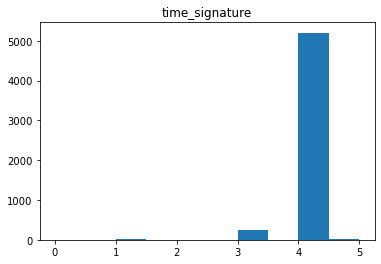

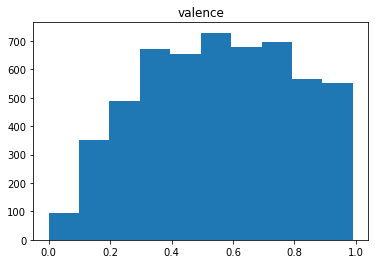

In [9]:
for i in rock_df.select_dtypes(include='number'):
    plt.hist(rock_df[i])
    plt.title(i)
    plt.show()

normalizing and scaling the data may help the non-normality

In [10]:
key_ = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
def categorize_key(keys):
    if keys==0:
        return key_[0]
    elif keys==1:
        return key_[1]
    elif keys==2:
        return key_[2]
    elif keys==3:
        return key_[3]
    elif keys==4:
        return key_[4]
    elif keys==5:
        return key_[5]
    elif keys==6:
        return key_[6]
    elif keys==7:
        return key_[7]
    elif keys==8:
        return key_[8]
    elif keys==9:
        return key_[9]
    elif keys==10:
        return key_[10]
    elif keys==11:
        return key_[11]
    else:
        return np.nan

rock_df['keys'] = rock_df['key'].apply(categorize_key)

print(rock_df.groupby("keys")["key"].count())

keys
A     765
A#    259
B     351
C     657
C#    388
D     739
D#    129
E     548
F     381
F#    319
G     715
G#    233
Name: key, dtype: int64


In [11]:
def categorize_live(live):
    if live >= 0.80:
        return 'live'
    else:
        return 'not live'
    
rock_df['live'] = rock_df['liveness'].apply(categorize_live)

print(rock_df.groupby("live")["liveness"].count())

live
live         116
not live    5368
Name: liveness, dtype: int64


In [12]:
rock_df.drop(['key', 'liveness', 'speechiness'], axis=1, inplace=True)
rock_df['time_signature'] = rock_df['time_signature'].astype(object)

<h3><font color='blue'>Analyzing Transformed Data</font></h3>

In [13]:
rock_df.describe()

,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,1991.196389,4.148302,49.413202,0.511047,-2.552716,-0.230840,-8.007842,125.317722,0.556601
std,15.331628,1.496269,17.317263,0.147916,1.530839,0.140380,3.534529,28.375444,0.241503
min,1956.000000,0.162533,0.000000,0.000000,-5.877843,-0.543205,-32.909000,0.000000,0.000000
25%,1978.000000,3.302100,40.000000,0.413000,-3.821232,-0.341398,-10.083750,104.362500,0.367000
50%,1993.000000,3.945442,52.000000,0.515000,-2.444137,-0.217037,-7.408500,123.885000,0.561000
75%,2004.000000,4.680271,62.000000,0.611000,-1.221319,-0.109405,-5.308000,142.731250,0.750250
max,2020.000000,24.091767,84.000000,0.987000,-0.005011,-0.001998,1.949000,217.913000,0.990000


In [14]:
rock_df.describe(include=['O'])

,time_signature,speech,keys,live
count,5484,5484,5484,5484
unique,5,2,12,2
top,4,music,A,not live
freq,5205,5456,765,5368


In [15]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   release_date    5484 non-null   int64  
 1   length          5484 non-null   float64
 2   popularity      5484 non-null   int64  
 3   danceability    5484 non-null   float64
 4   acousticness    5484 non-null   float64
 5   energy          5484 non-null   float64
 6   loudness        5484 non-null   float64
 7   tempo           5484 non-null   float64
 8   time_signature  5484 non-null   object 
 9   valence         5484 non-null   float64
 10  speech          5484 non-null   object 
 11  keys            5484 non-null   object 
 12  live            5484 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 557.1+ KB


Above is the new clean and transformed data. If we compare from before, we see that there are 4 object datatypes now. I categorized the live and speech variables and changed the time_signature variable into an object datatype. Finally for the keys variable, I changed the values corresponding to its key letter. For example 0=C, 1=C#......11=B, -1 means null according to the author who published the dataset in kaggle.

<h3><font color='blue'>Finding Null Values</font></h3>

In [16]:
rock_df.isnull().sum().loc[lambda x: x>0]

Series([], dtype: int64)

There doesn't seem to be any null values. So, next I will visualize the data to see any outliers w/ statistical tests + finding any outliers.

## Visualizing the Data (EDA)

In [17]:
from sklearn.preprocessing import normalize
for num in rock_df.select_dtypes(include='float'):
    rock_df[num] = normalize(np.array(rock_df[num]).reshape(1,-1)).reshape(-1,1)

Before we visualize the data, I want to normalize it so that we can change the shape to a more normal distribution

<h3><font color='blue'>Continuous/Continuous</font></h3>

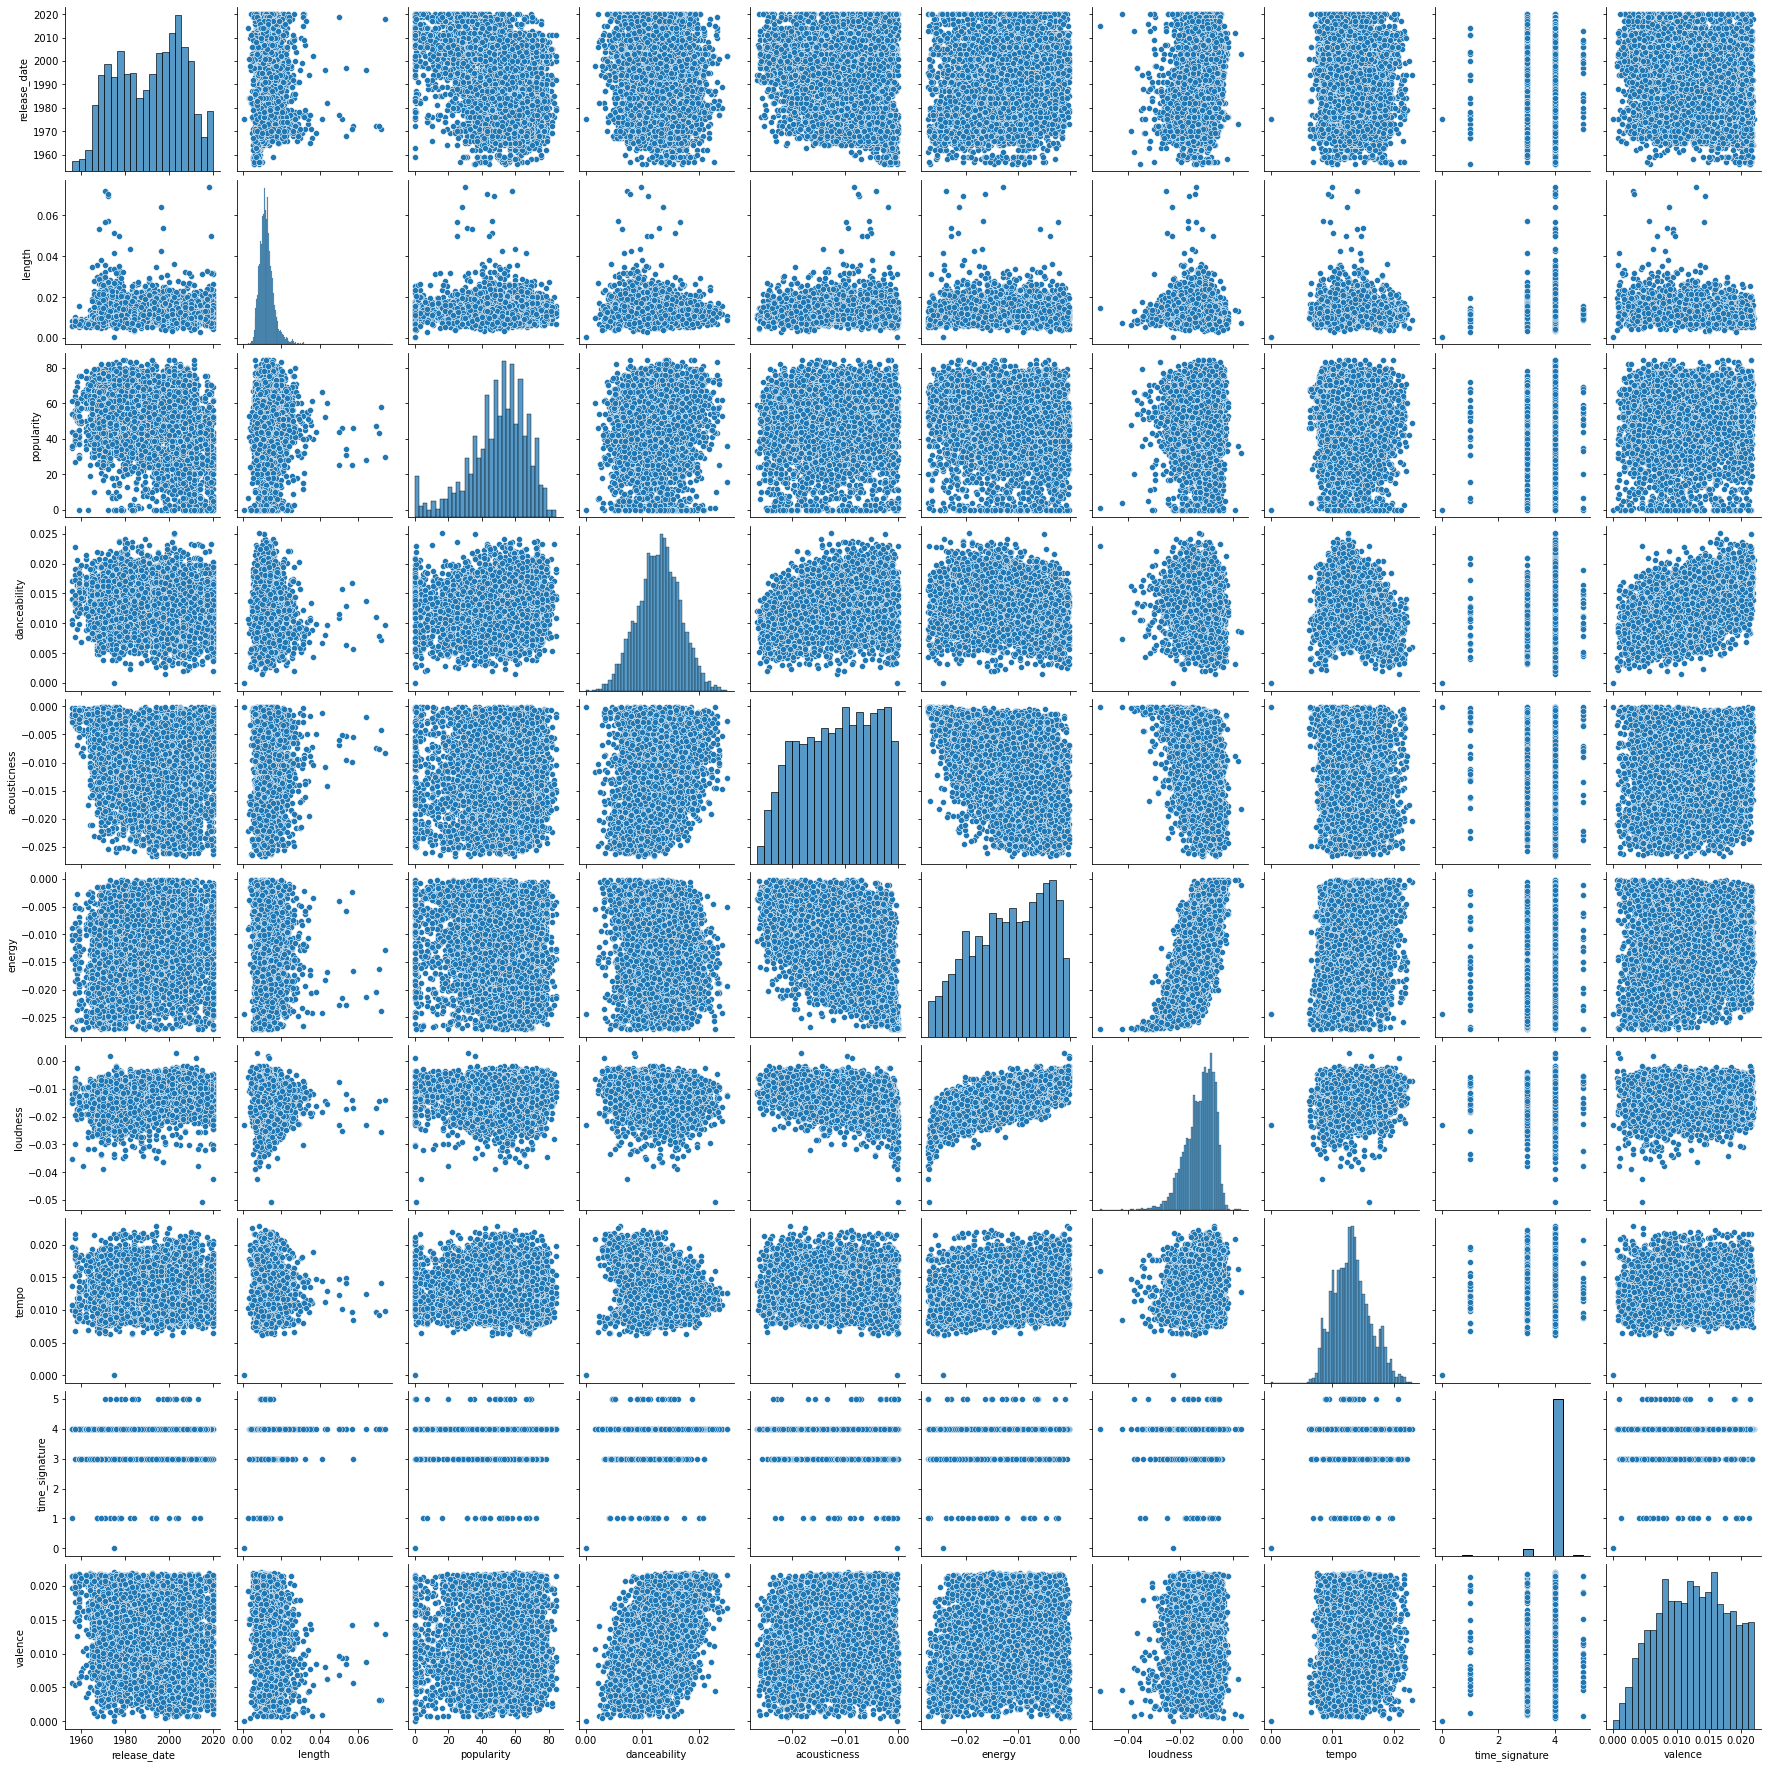

In [18]:
sns.pairplot(rock_df)

There doesn't seem to be any extreme outliers so I will now move on to EDA

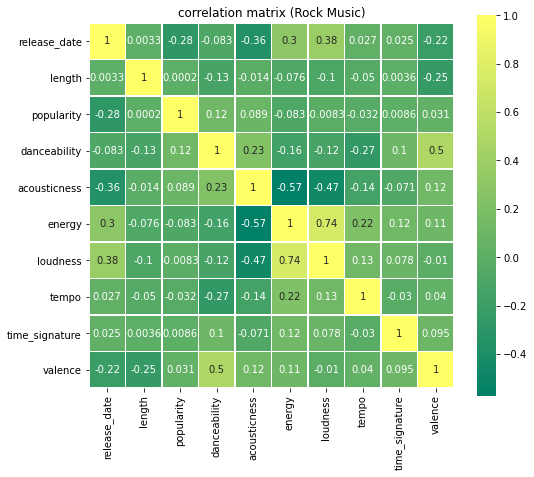

In [31]:
corrmat_rock = rock_df.corr()

plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
sns.heatmap(corrmat_rock, square=True, annot=True, linewidths=.5, cmap="summer")
plt.title("correlation matrix (Rock Music)")
plt.show()

<h4>Postive Relationship</h4>
<ul>
    <li>energy v loudness</li>
    <li>danceability v valence(happy/sadness sound)</li>
    <li>release_date v loudness</li>
    <li>release_date v energy</li>
</ul>

<h4>Negative Relationships</h4>
<ul>
    <li>acoustiness v energy</li>
    <li>acousticness v loudness</li>
    <li>acousticness v release_date</li>
    <li>popularity v release_date</li>
</ul>

<em>release date, energy, acousticness, energy, and loudness have high correlation with other features</em>

<h3><font color='blue'>Continuous/Categorical</font></h3>

In [20]:
rock_df.groupby("time_signature").mean()

,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
time_signature,,,,,,,,,
0,1975.000000,0.000498,0.000000,0.000000,-0.000180,-0.024406,-0.022920,0.000000,0.000000
1,1986.391304,0.011100,45.695652,0.011043,-0.009271,-0.014639,-0.014905,0.012576,0.010880
3,1990.245763,0.013011,49.114407,0.010833,-0.008781,-0.016252,-0.014622,0.013917,0.009243
4,1991.256868,0.012701,49.471278,0.013085,-0.011731,-0.011299,-0.012230,0.013142,0.012548
5,1993.105263,0.012037,44.315789,0.011413,-0.008789,-0.014020,-0.014629,0.012965,0.010089


time_signature '0' doesn't seem to be a valid value, so I will drop it. 

In [27]:
rock_df[['time_signature','tempo']] = rock_df[['time_signature', 'tempo']].replace(0, np.nan).dropna()

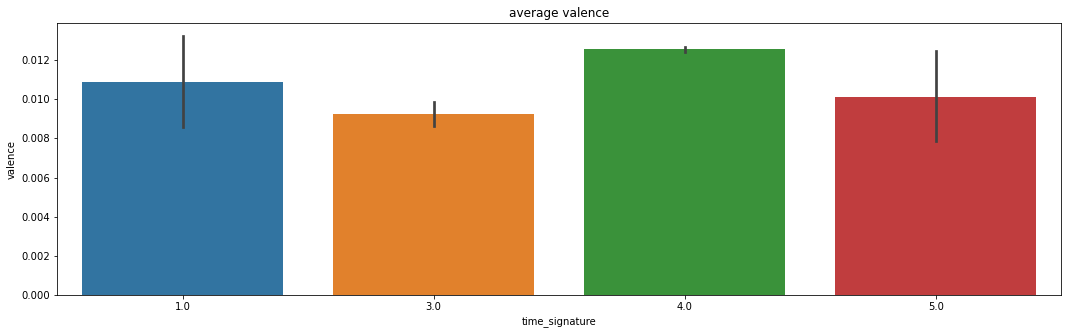

In [28]:
plt.figure(figsize=(18,5))

#plt.subplot(1,3,1)
sns.barplot(x=rock_df["time_signature"], y=rock_df["valence"])
plt.title("average valence")
plt.show()

In [29]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(rock_df, x='time_signature', y='valence')
fig.show()

In [23]:
rock_df.groupby("speech").mean()

,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
speech,,,,,,,,,
music,1991.168805,0.012707,49.468109,0.012981,-0.011593,-0.011549,-0.012347,0.013157,0.012401
music/spoken,1996.571429,0.011927,38.714286,0.011180,-0.009242,-0.009464,-0.013755,0.015739,0.009823


In [24]:
rock_df.groupby("live").mean()

,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
live,,,,,,,,,
live,1999.75000,0.015593,34.698276,0.010420,-0.011475,-0.007456,-0.011862,0.013492,0.009781
not live,1991.01155,0.012640,49.731185,0.013026,-0.011583,-0.011626,-0.012365,0.013163,0.012444


In [25]:
rock_df.groupby("keys").mean()

,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
keys,,,,,,,,,
A,1989.375163,0.012876,49.789542,0.012989,-0.011669,-0.011099,-0.012341,0.013410,0.012956
A#,1993.281853,0.012541,49.988417,0.013382,-0.011762,-0.011766,-0.012490,0.013067,0.012367
B,1994.071225,0.012688,50.717949,0.013309,-0.012932,-0.009806,-0.011616,0.013133,0.012391
C,1989.267884,0.012528,48.494673,0.013060,-0.010657,-0.012476,-0.012842,0.013138,0.012579
C#,1994.884021,0.012267,49.350515,0.012627,-0.012943,-0.010463,-0.011301,0.013150,0.011860
D,1990.010825,0.012811,48.281461,0.012875,-0.011364,-0.011869,-0.012747,0.013128,0.012242
D#,1992.744186,0.011963,49.155039,0.012701,-0.010606,-0.012117,-0.012187,0.013370,0.011142
E,1989.642336,0.012836,49.919708,0.012899,-0.011503,-0.011701,-0.012710,0.013256,0.012427
F,1990.900262,0.013106,50.677165,0.013279,-0.009969,-0.012785,-0.012753,0.012913,0.012456


In [ ]:
plt.figure(figsize=(18,5))

#plt.subplot(1,3,1)
sns.barplot(x=rock_df["keys"], y=rock_df["valence"])
plt.title("average valence")
plt.show()

<h3><font color='blue'>Categorical/Categorical</font></h3>

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="keys", hue="speech", data=rock_df, palette="Greens_d")
plt.show()

In [ ]:
count_table = pd.crosstab(rock_df["keys"], rock_df["live"])
count_table

In [ ]:
# configure_plotly_browser_state()

'''avg_price = data.groupby('Cluster').agg({'SalePrice':'mean'}).reset_index()

fig = px.bar(avg_price, x='Cluster', y='SalePrice', 
             title='Avg. Sale Price by Cluster', template='none')

fig.update_traces(marker_color='lightskyblue',
                  marker_line_color='black', 
                  marker_line_width=1)
fig.show()'''

In [ ]:
# take out the 0 or do something about them in time_signature var!
# other ways to deal with non-normality??
# make release_date categorical??
# what do the values of acousticness and loudness mean??
# look at jarque bera for normality!
# consider some plotly graphs!!
# consider pipeline stuff!!

## Model Prep